In [1]:
#7. Create a neural network for the given ‘houseprice.csv’ to predict the whether price of the house is above 
#or below median value or not.

import tensorflow as tf
import keras
import pandas
import sklearn
import matplotlib

2022-02-23 14:36:51.350839: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-23 14:36:51.350862: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import pandas as pd

df = pd.read_csv('housepricedata.csv')
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [4]:
X = dataset[:,0:10]
Y = dataset[:,10]

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

2022-02-23 14:39:01.253144: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-23 14:39:01.253173: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-23 14:39:01.253191: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Z238-UL): /proc/driver/nvidia/version does not exist
2022-02-23 14:39:01.280606: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.6802 - accuracy: 0.5147 - val_loss: 0.6704 - val_accuracy: 0.5753
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5499 - val_loss: 0.6618 - val_accuracy: 0.6210
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.6027 - val_loss: 0.6532 - val_accuracy: 0.7169
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.6977 - val_loss: 0.6452 - val_accuracy: 0.7489
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.7250 - val_loss: 0.6375 - val_accuracy: 0.7580
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.7309 - val_loss: 0.6300 - val_accuracy: 0.7854
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7485 - val_loss: 0.6229 - val_accuracy: 0.7945
Epoch 8/100
3

In [7]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.8813


0.8812785148620605

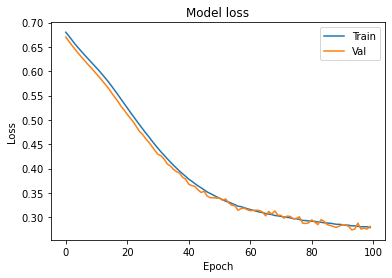

In [8]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

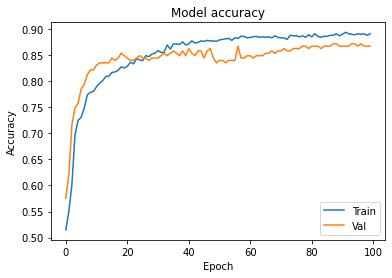

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [10]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4519 - accuracy: 0.7877 - val_loss: 0.4485 - val_accuracy: 0.8128
Epoch 2/100
32/32 [==============================] - 1s 20ms/step - loss: 0.3336 - accuracy: 0.8689 - val_loss: 0.2703 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2979 - accuracy: 0.8816 - val_loss: 0.4154 - val_accuracy: 0.8219
Epoch 4/100
32/32 [==============================] - 1s 22ms/step - loss: 0.3475 - accuracy: 0.8434 - val_loss: 0.3072 - val_accuracy: 0.8584
Epoch 5/100
32/32 [==============================] - 1s 22ms/step - loss: 0.2720 - accuracy: 0.8982 - val_loss: 0.2349 - val_accuracy: 0.9087
Epoch 6/100
32/32 [==============================] - 1s 22ms/step - loss: 0.2566 - accuracy: 0.8963 - val_loss: 0.2232 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 1s 21ms/step - loss: 0.2516 - accuracy: 0.9061 - val_loss: 0.2107 - val_accuracy: 0.9087
Epoch 

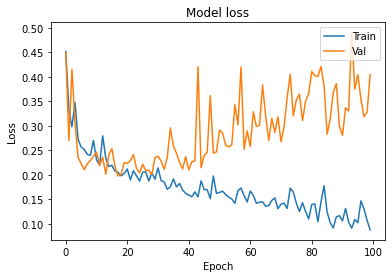

In [11]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

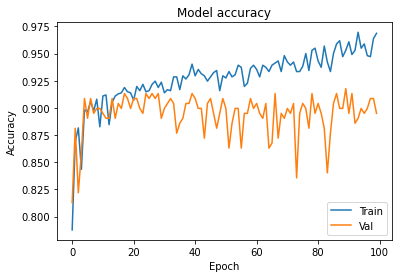

In [13]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [14]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 35ms/step - loss: 14.2262 - accuracy: 0.6086 - val_loss: 3.8818 - val_accuracy: 0.7671
Epoch 2/100
32/32 [==============================] - 1s 30ms/step - loss: 1.6557 - accuracy: 0.8386 - val_loss: 0.6938 - val_accuracy: 0.8402
Epoch 3/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5711 - accuracy: 0.8513 - val_loss: 0.5458 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5041 - accuracy: 0.8699 - val_loss: 0.4567 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4879 - accuracy: 0.8718 - val_loss: 0.5853 - val_accuracy: 0.8082
Epoch 6/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4802 - accuracy: 0.8738 - val_loss: 0.4869 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4753 - accuracy: 0.8875 - val_loss: 0.4385 - val_accuracy: 0.8995
Epoch

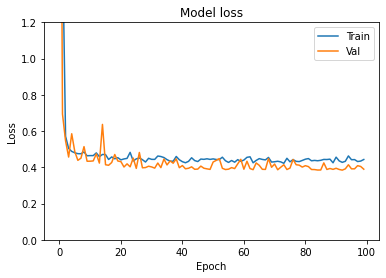

In [17]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

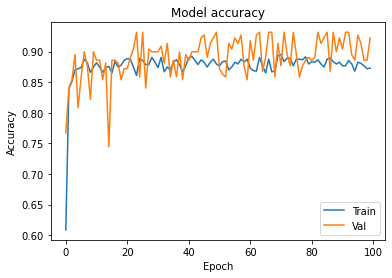

In [16]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()